quick checks of split gen samples ($2\mu2e$)

In [1]:
from rootpy.io import root_open
import os
from FireROOT.Analysis.Utils import *
from rootpy.plotting.style import set_style
from rootpy.plotting import Canvas, Efficiency, Legend

Welcome to JupyROOT 6.12/07


In [2]:
fn = os.path.join(os.getenv('CMSSW_BASE'), 'src/FireROOT/Analysis/python/outputs/rootfiles/slimTrees/recoZdToMu__TREE.root')
f = root_open(fn)

In [3]:
f.keys()

[Key('mulj')]

In [4]:
t=f.mulj
sorted(t.branchnames)

['dp_daudr',
 'dp_eta',
 'dp_lxy',
 'dp_lz',
 'dp_pt',
 'dsa_m_extrpdr',
 'dsa_m_gendr',
 'dsa_m_ncschits',
 'dsa_m_ndthits',
 'dsa_m_normchi2',
 'dsa_m_nsta',
 'dsa_m_pt',
 'dsa_m_pterrptinv',
 'dsa_m_samesign',
 'dsa_p_extrpdr',
 'dsa_p_gendr',
 'dsa_p_ncschits',
 'dsa_p_ndthits',
 'dsa_p_normchi2',
 'dsa_p_nsta',
 'dsa_p_pt',
 'dsa_p_pterrptinv',
 'dsa_p_samesign',
 'dsa_pm_pt',
 'dsa_pm_same',
 'genmu_m_eta',
 'genmu_m_pt',
 'genmu_p_eta',
 'genmu_p_pt',
 'lj_gendr',
 'lj_ndsa',
 'lj_pt',
 'lj_type',
 'mu_m_gendr',
 'mu_m_pt',
 'mu_m_samesign',
 'mu_m_selector',
 'mu_m_type',
 'mu_p_gendr',
 'mu_p_pt',
 'mu_p_samesign',
 'mu_p_selector',
 'mu_p_type',
 'mu_pm_pt',
 'mu_pm_same',
 's_LXY',
 's_MA',
 's_MXX']

In [5]:
set_style(MyStyle())
canvas = Canvas(500, 400)

INFO:rootpy.plotting.style] using ROOT style 'CMSTDR'


### lxy, |lz|

In [12]:
CATEG0 = 'abs(s_MA-0.25)<1e-6'
CATEG1 = 'abs(s_MA-1.2)<1e-6'
CATEG2 = 'abs(s_MA-5)<1e-6'

In [6]:
lxy_0 = t.Draw('dp_lxy', 'abs(s_MA-0.25)<1e-6', 'norm')
lxy_1 = t.Draw('dp_lxy', 'abs(s_MA-1.2)<1e-6',  'norm')
lxy_2 = t.Draw('dp_lxy', 'abs(s_MA-5)<1e-6',    'norm')

lz_0 = t.Draw('abs(dp_lz)', 'abs(s_MA-0.25)<1e-6', 'norm')
lz_1 = t.Draw('abs(dp_lz)', 'abs(s_MA-1.2)<1e-6',  'norm')
lz_2 = t.Draw('abs(dp_lz)', 'abs(s_MA-5)<1e-6',    'norm')

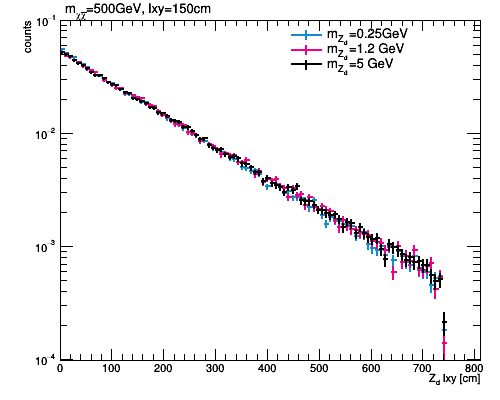

In [8]:
canvas.clear()

hs = [lxy_0, lxy_1, lxy_2]
for i, h in enumerate(hs):
    h.color=sigCOLORS[i]
    h.linewidth=2

draw(hs[:], pad=canvas, logy=True, ylimits=(1e-4,1e-1), xtitle='Z_{d} lxy [cm]', ytitle='counts')
leg = Legend(3, margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(lxy_0, 'm_{Z_{d}}=0.25GeV', 'LEP')
leg.AddEntry(lxy_1, 'm_{Z_{d}}=1.2 GeV', 'LEP')
leg.AddEntry(lxy_2, 'm_{Z_{d}}=5 GeV', 'LEP')
leg.Draw()
title = TitleAsLatex('m_{#chi#bar{#chi}}=500GeV, lxy=150cm')
title.Draw()
canvas.draw()

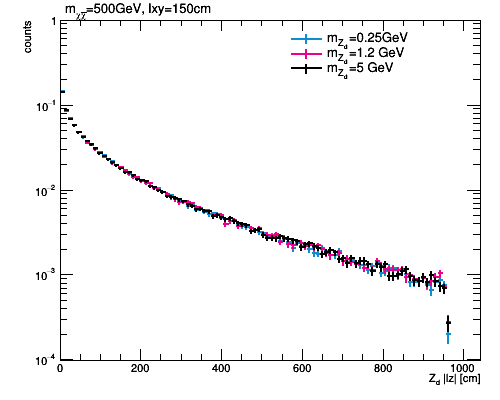

In [11]:
canvas.clear()

hs = [lz_0, lz_1, lz_2]
for i, h in enumerate(hs):
    h.color=sigCOLORS[i]
    h.linewidth=2

draw(hs[:], pad=canvas, logy=True, ylimits=(1e-4,1), xtitle='Z_{d} |lz| [cm]', ytitle='counts')
leg = Legend(3, margin=0.25, leftmargin=0.45,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(lxy_0, 'm_{Z_{d}}=0.25GeV', 'LEP')
leg.AddEntry(lxy_1, 'm_{Z_{d}}=1.2 GeV', 'LEP')
leg.AddEntry(lxy_2, 'm_{Z_{d}}=5 GeV', 'LEP')
leg.Draw()
title = TitleAsLatex('m_{#chi#bar{#chi}}=500GeV, lxy=150cm')
title.Draw()
canvas.draw()

### daughter $\Delta R$

In [29]:
daudr_0 = t.Draw("dp_daudr>>daudr_0(400,0,0.4)", CATEG0, 'norm')
daudr_1 = t.Draw("dp_daudr>>daudr_1(400,0,0.4)", CATEG1, 'norm')
daudr_2 = t.Draw("dp_daudr>>daudr_2(400,0,0.4)", CATEG2, 'norm')

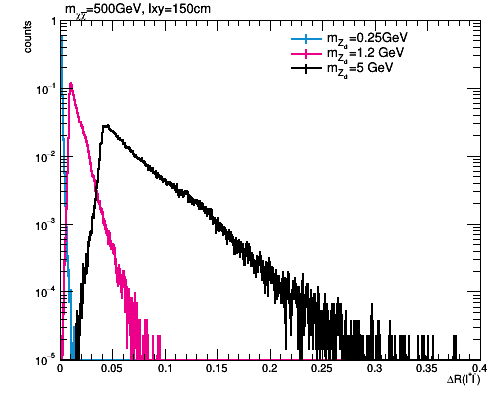

In [32]:
canvas.clear()

hs = [daudr_0, daudr_1, daudr_2]
for i, h in enumerate(hs):
    h.color=sigCOLORS[i]
    h.linewidth=2
    h.drawstyle='HIST E'
    h.fillstyle=0

draw(hs[:], pad=canvas, logy=True, ylimits=(1e-5,1), xtitle='#DeltaR(l^{+}l^{-})', ytitle='counts')
leg = Legend(3, margin=0.25, leftmargin=0.45,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(daudr_0, 'm_{Z_{d}}=0.25GeV', 'LEP')
leg.AddEntry(daudr_1, 'm_{Z_{d}}=1.2 GeV', 'LEP')
leg.AddEntry(daudr_2, 'm_{Z_{d}}=5 GeV', 'LEP')
leg.Draw()
title = TitleAsLatex('m_{#chi#bar{#chi}}=500GeV, lxy=150cm')
title.Draw()
canvas.draw()

### efficiency

$Z_d\rightarrow \mu^+\mu^-$

In [40]:
dplxy_total_0  = t.Draw(t.b.dp_lxy>>('dplxy_total_0', 500, 0, 750), CATEG0)
dplxy_passed_0 = t.Draw(t.b.dp_lxy>>('dplxy_passed_0', 500, 0, 750), CATEG0+'&lj_gendr>0')

dplxy_total_1  = t.Draw(t.b.dp_lxy>>('dplxy_total_1', 500, 0, 750), CATEG1)
dplxy_passed_1 = t.Draw(t.b.dp_lxy>>('dplxy_passed_1', 500, 0, 750), CATEG1+'&lj_gendr>0')

dplxy_total_2  = t.Draw(t.b.dp_lxy>>('dplxy_total_2', 500, 0, 750), CATEG2)
dplxy_passed_2 = t.Draw(t.b.dp_lxy>>('dplxy_passed_2', 500, 0, 750), CATEG2+'&lj_gendr>0')

In [41]:
effi_g_0 = Efficiency(dplxy_passed_0, dplxy_total_0).graph
effi_g_1 = Efficiency(dplxy_passed_1, dplxy_total_1).graph
effi_g_2 = Efficiency(dplxy_passed_2, dplxy_total_2).graph

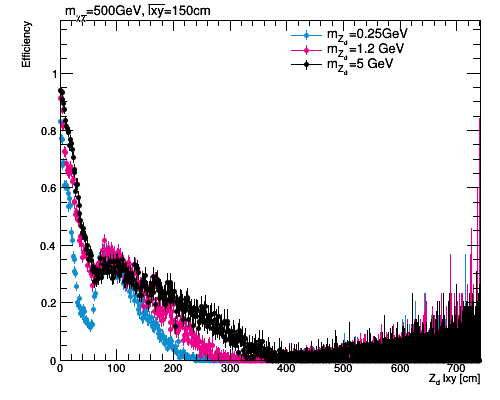

In [42]:
canvas.clear()

hs = [effi_g_0, effi_g_1, effi_g_2]
for i,h in enumerate(hs):
    h.color=sigCOLORS[i]
    h.drawstyle='APZ' if i==0 else 'PZ'
    h.markersize=0.5
    
draw(hs[:], pad=canvas, xtitle='Z_{d} lxy [cm]', ytitle='Efficiency')
leg = Legend(3, margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(effi_g_0, 'm_{Z_{d}}=0.25GeV', 'LEP')
leg.AddEntry(effi_g_1, 'm_{Z_{d}}=1.2 GeV', 'LEP')
leg.AddEntry(effi_g_2, 'm_{Z_{d}}=5 GeV', 'LEP')
leg.Draw()
title = TitleAsLatex('m_{#chi#bar{#chi}}=500GeV, #bar{lxy}=150cm')
title.Draw()
canvas.draw()

In [44]:
dplz_total_0  = t.Draw(abs(t.b.dp_lz)>>('dplz_total_0', 500, 0, 750), CATEG0)
dplz_passed_0 = t.Draw(abs(t.b.dp_lz)>>('dplz_passed_0', 500, 0, 750), CATEG0+'&lj_gendr>0')

dplz_total_1  = t.Draw(abs(t.b.dp_lz)>>('dplz_total_1', 500, 0, 750), CATEG1)
dplz_passed_1 = t.Draw(abs(t.b.dp_lz)>>('dplz_passed_1', 500, 0, 750), CATEG1+'&lj_gendr>0')

dplz_total_2  = t.Draw(abs(t.b.dp_lz)>>('dplz_total_2', 500, 0, 750), CATEG2)
dplz_passed_2 = t.Draw(abs(t.b.dp_lz)>>('dplz_passed_2', 500, 0, 750), CATEG2+'&lj_gendr>0')

In [34]:
effi_lzg_0 = Efficiency(dplz_passed_0, dplz_total_0).graph
effi_lzg_1 = Efficiency(dplz_passed_1, dplz_total_1).graph
effi_lzg_2 = Efficiency(dplz_passed_2, dplz_total_2).graph

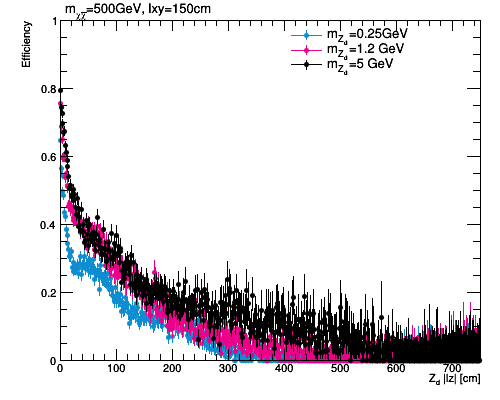

In [36]:
canvas.clear()

hs = [effi_lzg_0, effi_lzg_1, effi_lzg_2]
for i,h in enumerate(hs):
    h.color=sigCOLORS[i]
    h.drawstyle='APZ' if i==0 else 'PZ'
    h.markersize=0.5
    
draw(hs[:], pad=canvas, xtitle='Z_{d} |lz| [cm]', ytitle='Efficiency')
leg = Legend(3, margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(effi_lzg_0, 'm_{Z_{d}}=0.25GeV', 'LEP')
leg.AddEntry(effi_lzg_1, 'm_{Z_{d}}=1.2 GeV', 'LEP')
leg.AddEntry(effi_lzg_2, 'm_{Z_{d}}=5 GeV', 'LEP')
leg.Draw()
title = TitleAsLatex('m_{#chi#bar{#chi}}=500GeV, lxy=150cm')
title.Draw()
canvas.draw()

In [48]:
IN_RANGE='dp_lxy<400&abs(dp_lz)<500'

In [49]:
dpdaudr_total_0  = t.Draw(t.b.dp_daudr>>('dpdaudr_total_0', 100, 0, 0.1), CATEG0+'&'+IN_RANGE)
dpdaudr_passed_0 = t.Draw(t.b.dp_daudr>>('dpdaudr_passed_0', 100, 0, 0.1), CATEG0+'&'+IN_RANGE+'&lj_gendr>0')

dpdaudr_total_1  = t.Draw(t.b.dp_daudr>>('dpdaudr_total_1', 100, 0, 0.1), CATEG1+'&'+IN_RANGE)
dpdaudr_passed_1 = t.Draw(t.b.dp_daudr>>('dpdaudr_passed_1', 100, 0, 0.1), CATEG1+'&'+IN_RANGE+'&lj_gendr>0')

dpdaudr_total_2  = t.Draw(t.b.dp_daudr>>('dpdaudr_total_2', 100, 0, 0.1), CATEG2+'&'+IN_RANGE)
dpdaudr_passed_2 = t.Draw(t.b.dp_daudr>>('dpdaudr_passed_2', 100, 0, 0.1), CATEG2+'&'+IN_RANGE+'&lj_gendr>0')

In [50]:
effi_daudrg_0 = Efficiency(dpdaudr_passed_0, dpdaudr_total_0).graph
effi_daudrg_1 = Efficiency(dpdaudr_passed_1, dpdaudr_total_1).graph
effi_daudrg_2 = Efficiency(dpdaudr_passed_2, dpdaudr_total_2).graph

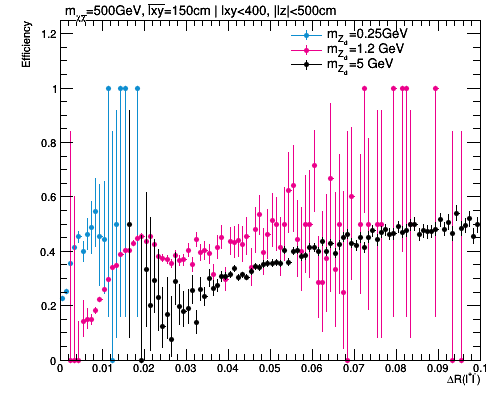

In [51]:
canvas.clear()

hs = [effi_daudrg_0, effi_daudrg_1, effi_daudrg_2]
for i,h in enumerate(hs):
    h.color=sigCOLORS[i]
    h.drawstyle='APZ' if i==0 else 'PZ'
    h.markersize=0.5
    
draw(hs[:], pad=canvas, xtitle='#DeltaR(l^{+}l^{-})', ytitle='Efficiency')
leg = Legend(3, margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(effi_daudrg_0, 'm_{Z_{d}}=0.25GeV', 'LEP')
leg.AddEntry(effi_daudrg_1, 'm_{Z_{d}}=1.2 GeV', 'LEP')
leg.AddEntry(effi_daudrg_2, 'm_{Z_{d}}=5 GeV', 'LEP')
leg.Draw()
title = TitleAsLatex('m_{#chi#bar{#chi}}=500GeV, #bar{lxy}=150cm | lxy<400, |lz|<500cm')
title.Draw()
canvas.draw()

$Z_d\rightarrow e^+e^-$

In [52]:
fn = os.path.join(os.getenv('CMSSW_BASE'), 'src/FireROOT/Analysis/python/outputs/rootfiles/slimTrees/recoZdToEl__TREE.root')
f = root_open(fn)
t=f.egmlj

In [53]:
dplxy_total_0  = t.Draw(t.b.dp_lxy>>('dplxy_total_0', 500, 0, 750), CATEG0)
dplxy_passed_0 = t.Draw(t.b.dp_lxy>>('dplxy_passed_0', 500, 0, 750), CATEG0+'&lj_gendr>0')

dplxy_total_1  = t.Draw(t.b.dp_lxy>>('dplxy_total_1', 500, 0, 750), CATEG1)
dplxy_passed_1 = t.Draw(t.b.dp_lxy>>('dplxy_passed_1', 500, 0, 750), CATEG1+'&lj_gendr>0')

dplxy_total_2  = t.Draw(t.b.dp_lxy>>('dplxy_total_2', 500, 0, 750), CATEG2)
dplxy_passed_2 = t.Draw(t.b.dp_lxy>>('dplxy_passed_2', 500, 0, 750), CATEG2+'&lj_gendr>0')

In [54]:
effi_g_0 = Efficiency(dplxy_passed_0, dplxy_total_0).graph
effi_g_1 = Efficiency(dplxy_passed_1, dplxy_total_1).graph
effi_g_2 = Efficiency(dplxy_passed_2, dplxy_total_2).graph

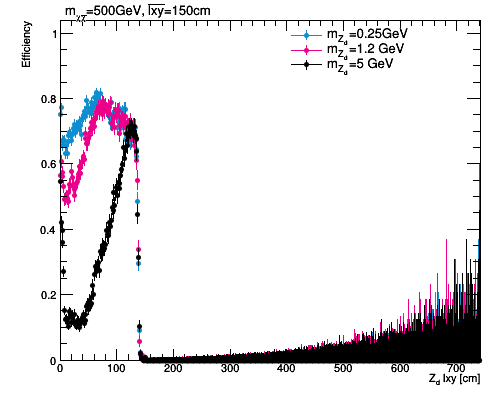

In [55]:
canvas.clear()

hs = [effi_g_0, effi_g_1, effi_g_2]
for i,h in enumerate(hs):
    h.color=sigCOLORS[i]
    h.drawstyle='APZ' if i==0 else 'PZ'
    h.markersize=0.5
    
draw(hs[:], pad=canvas, xtitle='Z_{d} lxy [cm]', ytitle='Efficiency')
leg = Legend(3, margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(effi_g_0, 'm_{Z_{d}}=0.25GeV', 'LEP')
leg.AddEntry(effi_g_1, 'm_{Z_{d}}=1.2 GeV', 'LEP')
leg.AddEntry(effi_g_2, 'm_{Z_{d}}=5 GeV', 'LEP')
leg.Draw()
title = TitleAsLatex('m_{#chi#bar{#chi}}=500GeV, #bar{lxy}=150cm')
title.Draw()
canvas.draw()

In [56]:
dplz_total_0  = t.Draw(abs(t.b.dp_lz)>>('dplz_total_0', 500, 0, 750), CATEG0)
dplz_passed_0 = t.Draw(abs(t.b.dp_lz)>>('dplz_passed_0', 500, 0, 750), CATEG0+'&lj_gendr>0')

dplz_total_1  = t.Draw(abs(t.b.dp_lz)>>('dplz_total_1', 500, 0, 750), CATEG1)
dplz_passed_1 = t.Draw(abs(t.b.dp_lz)>>('dplz_passed_1', 500, 0, 750), CATEG1+'&lj_gendr>0')

dplz_total_2  = t.Draw(abs(t.b.dp_lz)>>('dplz_total_2', 500, 0, 750), CATEG2)
dplz_passed_2 = t.Draw(abs(t.b.dp_lz)>>('dplz_passed_2', 500, 0, 750), CATEG2+'&lj_gendr>0')

In [57]:
effi_lzg_0 = Efficiency(dplz_passed_0, dplz_total_0).graph
effi_lzg_1 = Efficiency(dplz_passed_1, dplz_total_1).graph
effi_lzg_2 = Efficiency(dplz_passed_2, dplz_total_2).graph

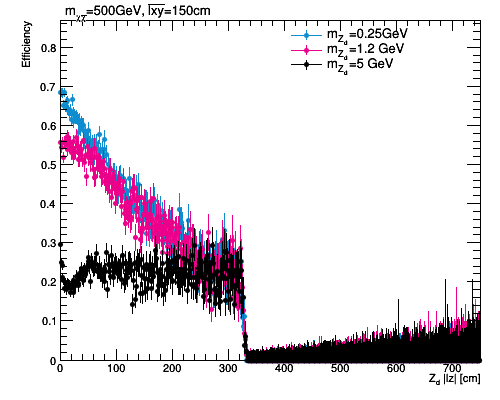

In [58]:
canvas.clear()

hs = [effi_lzg_0, effi_lzg_1, effi_lzg_2]
for i,h in enumerate(hs):
    h.color=sigCOLORS[i]
    h.drawstyle='APZ' if i==0 else 'PZ'
    h.markersize=0.5
    
draw(hs[:], pad=canvas, xtitle='Z_{d} |lz| [cm]', ytitle='Efficiency')
leg = Legend(3, margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(effi_lzg_0, 'm_{Z_{d}}=0.25GeV', 'LEP')
leg.AddEntry(effi_lzg_1, 'm_{Z_{d}}=1.2 GeV', 'LEP')
leg.AddEntry(effi_lzg_2, 'm_{Z_{d}}=5 GeV', 'LEP')
leg.Draw()
title = TitleAsLatex('m_{#chi#bar{#chi}}=500GeV, #bar{lxy}=150cm')
title.Draw()
canvas.draw()

In [59]:
IN_RANGE='dp_lxy<140&abs(dp_lz)<320'

In [60]:
dpdaudr_total_0  = t.Draw(t.b.dp_daudr>>('dpdaudr_total_0', 100, 0, 0.1), CATEG0+'&'+IN_RANGE)
dpdaudr_passed_0 = t.Draw(t.b.dp_daudr>>('dpdaudr_passed_0', 100, 0, 0.1), CATEG0+'&'+IN_RANGE+'&lj_gendr>0')

dpdaudr_total_1  = t.Draw(t.b.dp_daudr>>('dpdaudr_total_1', 100, 0, 0.1), CATEG1+'&'+IN_RANGE)
dpdaudr_passed_1 = t.Draw(t.b.dp_daudr>>('dpdaudr_passed_1', 100, 0, 0.1), CATEG1+'&'+IN_RANGE+'&lj_gendr>0')

dpdaudr_total_2  = t.Draw(t.b.dp_daudr>>('dpdaudr_total_2', 100, 0, 0.1), CATEG2+'&'+IN_RANGE)
dpdaudr_passed_2 = t.Draw(t.b.dp_daudr>>('dpdaudr_passed_2', 100, 0, 0.1), CATEG2+'&'+IN_RANGE+'&lj_gendr>0')

In [61]:
effi_daudrg_0 = Efficiency(dpdaudr_passed_0, dpdaudr_total_0).graph
effi_daudrg_1 = Efficiency(dpdaudr_passed_1, dpdaudr_total_1).graph
effi_daudrg_2 = Efficiency(dpdaudr_passed_2, dpdaudr_total_2).graph

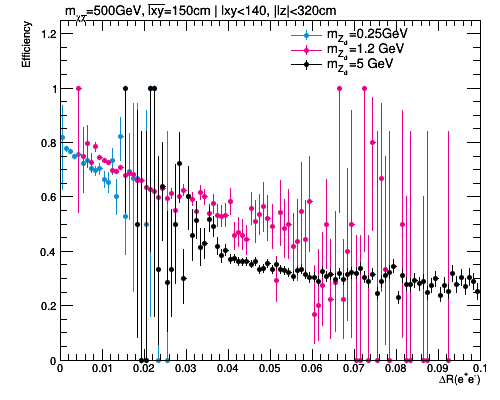

In [63]:
canvas.clear()

hs = [effi_daudrg_0, effi_daudrg_1, effi_daudrg_2]
for i,h in enumerate(hs):
    h.color=sigCOLORS[i]
    h.drawstyle='APZ' if i==0 else 'PZ'
    h.markersize=0.5
    
draw(hs[:], pad=canvas, xtitle='#DeltaR(e^{+}e^{-})', ytitle='Efficiency')
leg = Legend(3, margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(effi_daudrg_0, 'm_{Z_{d}}=0.25GeV', 'LEP')
leg.AddEntry(effi_daudrg_1, 'm_{Z_{d}}=1.2 GeV', 'LEP')
leg.AddEntry(effi_daudrg_2, 'm_{Z_{d}}=5 GeV', 'LEP')
leg.Draw()
title = TitleAsLatex('m_{#chi#bar{#chi}}=500GeV, #bar{lxy}=150cm | lxy<140, |lz|<320cm')
title.Draw()
canvas.draw()